<a href="https://colab.research.google.com/github/angyf/Proyecto_Final/blob/main/modelos_finales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias y funciones

In [1]:
# importamos librerias que nos seran de utilidad 
! pip install plotly
!pip install PyDrive

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.models import model_from_json
from sklearn import tree as treeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Funciones para obtener eficiencia de nuestros modelos
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

# Datos

In [3]:
#Cargamos nuestro dataset

url='https://drive.google.com/file/d/1aYkDD_1Sp3rIQmcOJUAPFvJfGAIMokb-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,index_col=0)

# separamos nuestros datos en la variable a predecir y y las variables independientes que resultaron significativas para los modelos a crear
y=df.enfermedad_cardiaca
X=df.drop(['enfermedad_cardiaca','imc','sexo','presion_diastolica'],axis=1)

# separar en datos de prueba y entrenamiento
X_train_full,X_valid_full, y_train, y_valid=train_test_split(X,y,test_size=0.3,random_state=15)

# Seleccionar variables numericas 
numerical_cols=[name for name in X_train_full.columns if X_train_full[name].dtype in ["int64","float64"]]

# seleccionar las columnas que queremos
X_train =X_train_full[numerical_cols].copy()
X_valid=X_valid_full[numerical_cols].copy()


In [4]:
#Preprocesar las variables numericas
numerical_transformer= SimpleImputer(strategy="most_frequent")

#Juntar las variables preprocesadas
preprocessor= ColumnTransformer(
    transformers=[("num",numerical_transformer,numerical_cols)])


Lo que se busca a continuación es crear distintos modelos con el fin de obtener el que realice una mejor clasificación sobre si la persona desarrollara o no una enfermedad cardiaca de acuerdo con ciertas caracteristicas.

Se realizo la creación de 4 modelos,:

* Red neuronal

* Regresión logistica

* Árboles de decisión

* Bosque aleatorios

# REDES NEURONALES

In [8]:
# Definamos nuestra red neuronal con Keras
red_neuronal = Sequential()
#Agregamos capas, imput_dim es el numero de inputs que recibe cada capa, solo se
#le agrega a la primera pues conocemos el numero de variables con las que iniciamos 
red_neuronal.add(Dense(27, input_dim=9, activation="relu"))
red_neuronal.add(Dense(16, activation="relu"))
red_neuronal.add(Dense(8, activation="relu"))
red_neuronal.add(Dense(10, activation="relu"))
red_neuronal.add(Dense(15, activation="relu"))
red_neuronal.add(Dense(18, activation="relu"))
red_neuronal.add(Dense(5, activation="relu"))
red_neuronal.add(Dense(7, activation="relu"))
red_neuronal.add(Dense(2, activation="relu"))
red_neuronal.add(Dense(5, activation="relu"))
#La ultima función de activación es sigmoide debido a que el resultado esperado es
#una variable binaria
red_neuronal.add(Dense(1, activation="sigmoid"))
# Compilar
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#Entrenamos el modelo
red_neuronal.fit(X_train,y_train, epochs=130, batch_size= 28)

1750/1750 [==============================] - 4s 2ms/step - loss: 0.5443 - accuracy: 0.7299
Epoch 126/130
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5447 - accuracy: 0.7321
Epoch 127/130
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5465 - accuracy: 0.7341
Epoch 128/130
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5422 - accuracy: 0.7339
Epoch 129/130
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5449 - accuracy: 0.7301
Epoch 130/130
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5467 - accuracy: 0.7279


In [ ]:
#prediccion sobre la red
y_predict = red_neuronal.predict_classes(X_valid)

# Métricas del modelo
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

# Guardar el modelo entrenado
model_json = red_neuronal.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serializar los pesos a HDF5
red_neuronal.save_weights("model.h5")

## BITACORAS DE REDES NEURONALES

En este caso se realizo el entrenamiento de distintas redes neuronales con el fin de lograr una mejor predicción, por ello se hizo un registro de bitacoras

**Experimento 0**
- Capas 9
- Neuronas por capa 10,15,8,4,9,11,5,2,1
- Epochs 68
- Batch 45
- Precision 49.97%
- Sensibilidad 100%
- Especificidad 0%

---

**Experimento 1**
- Capas  6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 130
- Batch 28
- Precision 72.73%
- Sensibilidad 70.22%
- Especificidad 75.24%
---

**Experimento 2**
- Capas 4
- Neuronas por capa 10,15,8,1
- Epochs 130
- Batch 28
- Precision 72.67%
- Sensibilidad 65.38%
- Especificidad 79.96%
---
**Experimento 3**
- Capas  9
- Neuronas por capa 10,15,8,4,9,11,5,2,1
- Epochs 150
- Batch 15
- Precision 49.97%
- Sensibilidad 100%
- Especificidad 0%

---
**Experimento 4**
- Capas 6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 175
- Batch 28
- Precision 72.78%
- Sensibilidad 66.82%
- Especificidad 78.74%
---
**Experimento 5**
- Capas 8
- Neuronas por capa 10,15,23,14,7,11,4,1
- Epochs 130
- Batch 28
- Precision 72.82%
- Sensibilidad 71.44%
- Especificidad 74.20%
---
**Experimento 6**
- Capas 8
- Neuronas por capa 23,11,5,7,12,4,8,1
- Epochs 250
- Batch 37
- Precision 72.82%
- Sensibilidad 65.60%
- Especificidad 80.04%
---
**Experimento 7**
- Capas 10
- Neuronas por capa 16,7,21,13,9,4,8,3,6,1
- Epochs 175
- Batch 28
- Precision 49.97%
- Sensibilidad 100%
- Especificidad 0%
---
**Experimento 8**
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 130
- Batch 28
- Precision 72.23%
- Sensibilidad 76.31%
- Especificidad 68.16%
---
**Experimento 9**
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 250
- Batch 37
- Precision 72.66%
- Sensibilidad 62.76%
- Especificidad 82.55%
---
**Experimento 10**
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 175
- Batch 28
- Precision 72.97%
- Sensibilidad 69.19
- Especificidad 76.74
---
**Experimento 11**
- Capas 11
- Neuronas por capa  27,16,8,10,15,18,5,7,2,5,1
- Epochs 65
- Batch 28
- Precision 72.33%
- Sensibilidad 75.79%
- Especificidad 68.88%
---
**Experimento 12**
- Capas 15
- Neuronas por capa 29,16,8,10,15,18,12,7,13,8,5,3,7,5,1
- Epochs 150
- Batch 28
- Precision 72.92%
- Sensibilidad  67.07%
- Especificidad 78.77%
---
**Experimento 13** 
- Capas 8
- Neuronas por capa 12,16,8,4,13,7,5,1
- Epochs 120
- Batch 37
- Precision 72.28%
- Sensibilidad 62.06%
- Especificidad 82.47%
---
**Experimento 14**
- Capas 8
- Neuronas por capa 27,16,8,10,18,7,5,1
- Epochs 125
- Batch 35
- Precision 71.60
- Sensibilidad 57.7
- Especificidad 85.5%
---
**Experimento 15**
- Capas 11
- Neuronas por capa 29,16,8,10,15,17,12,5,13,4,1
- Epochs 150
- Batch 28
- Precision 73.11%
- Sensibilidad 68.81
- Especificidad 77.41%
---
**Experimento 16** no lo descargue
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 175
- Batch 35
- Precision 72.80
- Sensibilidad 66.08
- Especificidad 79.52
---
**Experimento 17**
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 65
- Batch 28
- Precision  71.41
- Sensibilidad 78.83
- Especificidad 63,99

---
**Experimento 18**
- Capas 11
- Neuronas por capa 27,16,8,10,15,18,5,7,2,5,1
- Epochs 35
- Batch 28
- Precision 72.65
- Sensibilidad 68.11
- Especificidad 77.18


Finalmente se eligio el modelo 8 que cuenta con métricas que se consideraron adecuadas para el tipo de problema que se esta trabajando, por lo que se realiza su carga para poder replicar su precisión, especificidad  y sensibilidad.

In [9]:
# Damos los permisos para almacenar los archivos de manera temporal 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# importamos los archivos de Drive del modelo entrenado previamente elegido.
downloaded = drive.CreateFile({'id':"1DHz41rg66pivlX9flAjFemMNy0-bIjW7"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.json') 
downloaded = drive.CreateFile({'id':"17mYXO8gqTkQFIZg8SKfVCh2_0rtq5HzY"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.h5') 


In [10]:
# cargar la información para el modelo elegido
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Modelo cargado.


In [11]:
#prediccion del modelo cargado
y_predict = loaded_model.predict_classes(X_valid)

# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_red = calcularAccuracy(TP, TN, FP, FN)
sen_red = calcularSensibilidad(TP, TN, FP, FN)
spec_red = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_red)+"%")
print("Sensibilidad:"+str(sen_red)+"%")
print("Especificidad:"+str(spec_red)+"%")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Precision:72.23809523809524%
Sensibilidad:76.31252977608385%
Especificidad:68.16753926701571%


# Regresión logistica

In [12]:
# definimos el modelo
reg= LogisticRegression(max_iter=45000,random_state=23)
#conjuntar los datos preprocesados
pipeReg=Pipeline(steps=[("preprocessor",preprocessor),
                            ("model",reg)])
#Embonar el training
pipeReg.fit(X_train,y_train)
# Predicción
preds= pipeReg.predict(X_valid)

In [13]:

# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, preds)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_rl = calcularAccuracy(TP, TN, FP, FN)
sen_rl = calcularSensibilidad(TP, TN, FP, FN)
spec_rl = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_rl)+"%")
print("Sensibilidad:"+str(sen_rl)+"%")
print("Especificidad:"+str(spec_rl)+"%")

Precision:71.89999999999999%
Sensibilidad:67.336827060505%
Especificidad:76.4588291289862%


# Árboles de Decisión

In [14]:
arbol = treeClassifier.DecisionTreeClassifier(random_state=83)
arbol = arbol.fit(X_train, y_train)

#plt.figure(figsize = (10,10), dpi = 300)
#treeClassifier.plot_tree(arbol,filled = True);
#plt.show()

In [15]:
y_pred = arbol.predict(X_valid)

enfermedad = np.array(y_valid)
predictions = np.array(y_pred)
confusion_matrix(enfermedad, predictions)

array([[6950, 3555],
       [4004, 6491]])

In [16]:
resultado = confusion_matrix(enfermedad, predictions)

(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN)+"\n")
 
acc_ar = calcularAccuracy(TP, TN, FP, FN)
sen_ar = calcularSensibilidad(TP, TN, FP, FN)
spec_ar = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_ar)+"%")
print("Sensibilidad:"+str(sen_ar)+"%")
print("Especificidad:"+str(spec_ar)+"%")

True positives: 6491
True negatives: 6950
False positives: 3555
False negative: 4004

Precision:64.0047619047619%
Sensibilidad:61.84849928537399%
Especificidad:66.15897191813423%


In [17]:
score= mean_absolute_error(y_valid,predictions)
print("MAE:  ",score,"\n\n")

MAE:   0.35995238095238097 




# Random Forest

In [18]:
bosque = RandomForestRegressor(n_estimators=80, random_state=1)
bosque.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [19]:
preds= bosque.predict(X_valid)

In [20]:
score= mean_absolute_error(y_valid,preds)
print("MAE:  ",score,"\n\n")

MAE:   0.3686931260707802 




# COMPARACIÓN DE MODELOS

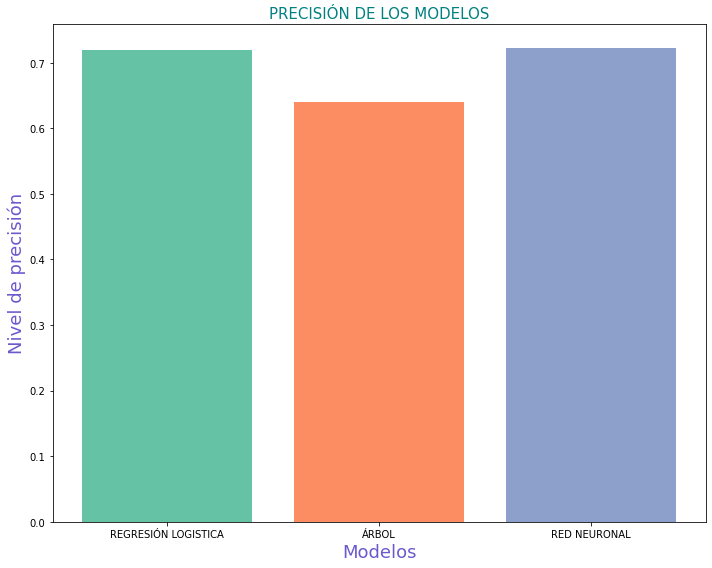

In [21]:
#COMPARAMOS LA PRECISION DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

# Creamos la lista de los modelos
models = [reg,arbol]

# inicia variables vacía para el loop
train_accuracy = []
test_accuracy = []

# Genera el calulo de tu medida a elegir

for i in models:
  #  y_pred_train = i.predict(X_train)
  #  accuracy_train = accuracy_score(y_train,y_pred_train)
  #  train_accuracy.append(accuracy_train)
    y_pred_test = i.predict(X_valid)
    accuracy_test = accuracy_score(y_valid,y_pred_test)
    test_accuracy.append(accuracy_test)

# Debido a que la predicción de la red se realiza con ayuda de la función predict_classes
# se agrega la precisión de manera individual

test_accuracy.append(acc_red/100)

# Grafica el accuracy
colors=sns.color_palette("Set2",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], test_accuracy,color=colors)
plt.title('PRECISIÓN DE LOS MODELOS', fontsize=15, color='teal')
plt.xlabel('Modelos', fontsize=18, color='slateblue')
plt.ylabel('Nivel de precisión', fontsize=18, color='slateblue')
plt.tight_layout()
plt.show()

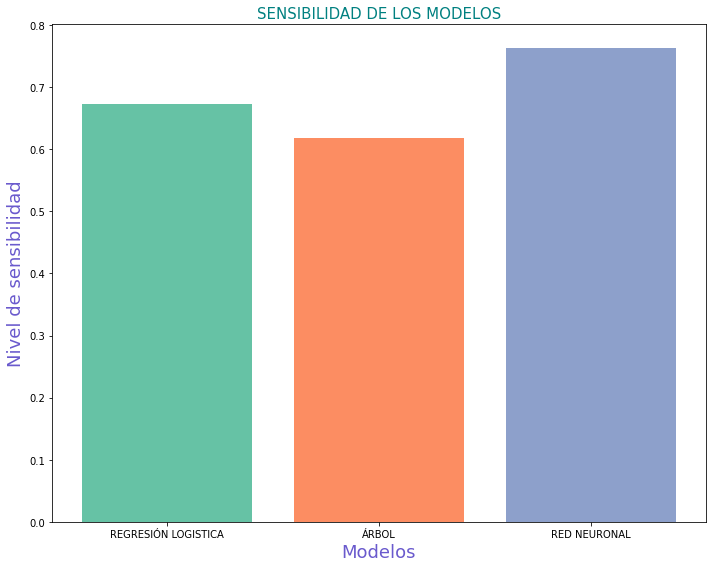

In [22]:
sensibilidad=[sen_rl/100,sen_ar/100,sen_red/100]

# Grafica sensibilidad
colors=sns.color_palette("Set2",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], sensibilidad,color=colors)
plt.title('SENSIBILIDAD DE LOS MODELOS', fontsize=15, color='teal')
plt.xlabel('Modelos', fontsize=18, color='slateblue')
plt.ylabel('Nivel de sensibilidad', fontsize=18, color='slateblue')
plt.tight_layout()
plt.show()

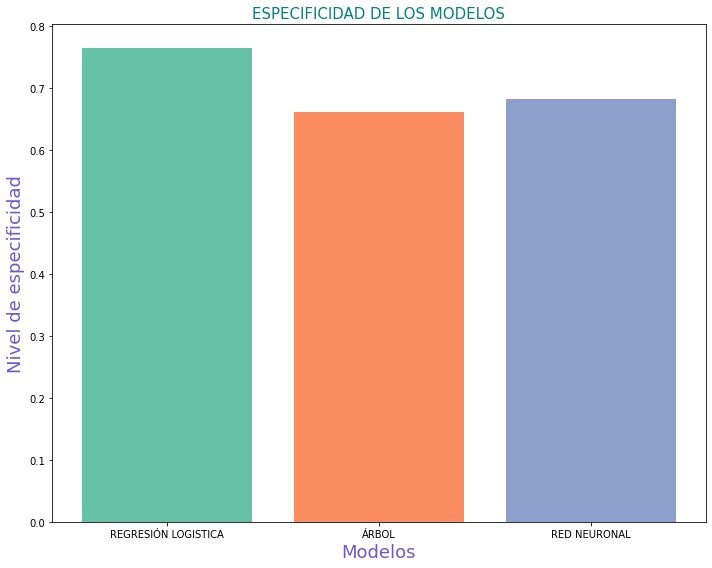

In [23]:
especificidad=[spec_rl/100,spec_ar/100,spec_red/100]

# Grafica sensibilidad
colors=sns.color_palette("Set2",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], especificidad,color=colors)
plt.title('ESPECIFICIDAD DE LOS MODELOS', fontsize=15, color='teal')
plt.xlabel('Modelos', fontsize=18, color='slateblue')
plt.ylabel('Nivel de especificidad', fontsize=18, color='slateblue')
plt.tight_layout()
plt.show()